# Question: What is the stratigraphy of the Black Widow Field in US GOM?

You've been asked to figure understand a field that you have no previous experience with.  Before you load wells and seismic you understand the field by looking at the volumes of biostratigraphic data that have been reported to the US Government.

![alt text](images/black_widow.png)

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_colwidth', 140)

In [2]:
#list of well API's from Black Widow Field

black_widow_wells = [608104004700, 608104010000, 608104010001, 608105002500, 608105002501, 608105006200, 608105006201, 608105006202, 608105007900, 608105007901, 608105007902,
                      608105007903, 608105008000, 608105008001, 608105008002, 608105008003, 608105008004, 608105008005, 608105008006, 608105008007, 608105008008,
                     608105008009, 608105008100, 608105008101, 608105008102, 608105008103, 608105008104, 608105008700, 608105009500, 608105009600,
                     608105009601, 608105009800, 608105009801, 608105009900, 608105009901, 608105010000, 608105010001]

## Step 1: Load and Inspect the Data

In [3]:
#Load and inspect data
mess = pd.read_csv('..data/gepaldmp_Paleo.txt', header=None)
mess.head()

,0
0,P608054001600 2 2 703007030DEFATfirst sample examined DEFIN5
1,P608054001600 2 2 703107031DEFINLower Pleistocene (Calabrian) Sphaeroidinella dehiscens acme B DEFIN5
2,P608054001600 2 2 724007240DEFATLower Pleistocene (Gelasian) Menardella miocenica DEFIN5
3,P608054001600 2 2 787307873DEFATlast sample examined DEFIN5
4,P608054001600 3 2 703007030DEFATfirst sample examined DEFAT


#### This is a mess, but not impossible.
However, the header information for the table shows that the data is organized by start position, character length

![alt text](images/messy_data.png "Header Information for Biostratigraphy Table")

## Step 2. Clean and Organize data

##### We can use this information to index into the data to separate out the columns
![alt text](images/geology.png)

In [4]:
#example of indexing, 
#Note indexing starts with 0 and ends with the integer after the desired selection

target = 'geology'

print(target[0:3])
print(target[3:7])

geo
logy


In [5]:
#Clean up table with indexing 12 separate columns

#create empty dataframe
df = pd.DataFrame()

#Index the  columns from BOEM document instructions
df['Point']=mess[0].str[0:1].astype(str)
df['API']=mess[0].str[1:13].astype(np.int64)
df['Report_ID']=mess[0].str[13:15].astype(int)
df['Total_Report']=mess[0].str[15:17].astype(int)
df['MD']=mess[0].str[17:22].astype(int)
df['TVD']=mess[0].str[22:27].astype(int)
df['Conf_PALEO']=mess[0].str[27:30].astype(str)
df['AT_IN_PALEO']=mess[0].str[30:32].astype(str)
df['PALEO']=mess[0].str[32:132].astype(str)
df['Conf_ECO']=mess[0].str[132:135].astype(str)
df['AT_IN_ECO']=mess[0].str[135:137].astype(str)
df['ECO']=mess[0].str[137:138].astype(str)
df['PALEO_clean'] = df['PALEO'].str.strip() #extra step to remove whitespace

In [6]:
#Inspect data table after indexing
df.head()

,Point,API,Report_ID,Total_Report,MD,TVD,Conf_PALEO,AT_IN_PALEO,PALEO,Conf_ECO,AT_IN_ECO,ECO,PALEO_clean
0,P,608054001600,2,2,7030,7030,DEF,AT,first sample examined,DEF,IN,5,first sample examined
1,P,608054001600,2,2,7031,7031,DEF,IN,Lower Pleistocene (Calabrian) Sphaeroidinella dehiscens acme B,DEF,IN,5,Lower Pleistocene (Calabrian) Sphaeroidinella dehiscens acme B
2,P,608054001600,2,2,7240,7240,DEF,AT,Lower Pleistocene (Gelasian) Menardella miocenica,DEF,IN,5,Lower Pleistocene (Gelasian) Menardella miocenica
3,P,608054001600,2,2,7873,7873,DEF,AT,last sample examined,DEF,IN,5,last sample examined
4,P,608054001600,3,2,7030,7030,DEF,AT,first sample examined,DEF,AT,,first sample examined


## Step 3. Filtering and add columns
Looking over the first 5 rows of the dataframe we notice some data that isn't useful or is missing:
1. We only want the biostratigraphic samples, not the mentions of "salt" or "first sample examined".  Let's filter those out.
2. The "PALE_clean" column has lots of information in it (Epoch, Age, species).  Let's separate those out into separate columns.
3. An Age Millions of Years column would be useful for plotting.

In [7]:
#All "Paleo_clean" entries with bug names start with a classicifation of whether they are "Upper, Middle, or Lower"
#We filter to rows that only contain these words.

only_bugs = df[(df['PALEO_clean'].str.contains("Lower"))|(df['PALEO_clean'].str.contains("Upper"))|
         (df['PALEO_clean'].str.contains("Middle"))]

In [8]:
#To split a column we write a function that loops through a list of names

new_cols = ['Epoch','Age', 'Species']

only_bugs_split = only_bugs.copy()
for i in range(0,3):
    only_bugs_split[new_cols[i]]=only_bugs['PALEO_clean'].str.split(pat='\(|\)', expand=True)[i]

#Inspect split table
only_bugs_split=only_bugs_split.drop(['PALEO', 'PALEO_clean'], axis=1) #remove redundant columns 
only_bugs_split.head()

,Point,API,Report_ID,Total_Report,MD,TVD,Conf_PALEO,AT_IN_PALEO,Conf_ECO,AT_IN_ECO,ECO,Epoch,Age,Species
1,P,608054001600,2,2,7031,7031,DEF,IN,DEF,IN,5,Lower Pleistocene,Calabrian,Sphaeroidinella dehiscens acme B
2,P,608054001600,2,2,7240,7240,DEF,AT,DEF,IN,5,Lower Pleistocene,Gelasian,Menardella miocenica
5,P,608054001600,3,2,7031,7031,DEF,IN,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster brouweri
6,P,608054001600,3,2,7270,7270,POS,AT,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster pentaradiatus
7,P,608054001600,3,2,7840,7840,DEF,AT,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster surculus


### Using Dictionaries
Python dictionaries are a data type that allows you to store a variety of informaiton so that it can be accessed later by different commands.  Here's an example about my favorite dinosaur: Triceratops.

![alt text](images/triceratops.png)

In [9]:
#Here's a premade dictionary that describes the youngest data for the ages from Jurassic to Present

ages_dictionary = {'Albian': 100.5, 'Aptian': 113.0, 'Aquitanian': 20.44, 'Barremian': 125.0, 'Bartonian': 37.8, 'Berriasian': 139.8, 'Burdigalian': 15.97,
                    'Calabrian': 0.012, 'Callovian': 163.5, 'Campanian': 72.1, 'Cenomanian': 93.9, 'Chattian': 23.03, 'Coniacian': 86.3, 'Danian': 61.6,
                   'Gelasian': 1.8, 'Hauterivian': 129.4, 'Ionian': 0.7809999999999999, 'Kimmeridgian': 152.1, 'Langhian': 13.82, 'Lutetian': 41.2, 'Maastrichtian': 66.0,
                    'Messinian': 5.33, 'Oxfordian': 157.3, 'Piacenzian': 2.58, 'Priabonian': 33.9, 'Rupelian': 27.82, 'Santonian': 83.6, 'Selandian': 59.2,
                    'Serravallian': 11.63, 'Thanetian': 56.0, 'Tithonian': 145.0, 'Tortonian': 7.246, 'Turonian': 89.8, 'Valanginian': 132.9, 'Ypresian': 47.8, 'Zanclian': 3.6}

In [11]:
#Map Ages to Ages MA using the dictionary
only_bugs_ages = only_bugs_split.copy()
only_bugs_ages['Age_MA']=only_bugs_ages['Age'].map(ages_dictionary)
only_bugs_ages.head()

,Point,API,Report_ID,Total_Report,MD,TVD,Conf_PALEO,AT_IN_PALEO,Conf_ECO,AT_IN_ECO,ECO,Epoch,Age,Species,Age_MA
1,P,608054001600,2,2,7031,7031,DEF,IN,DEF,IN,5,Lower Pleistocene,Calabrian,Sphaeroidinella dehiscens acme B,0.012
2,P,608054001600,2,2,7240,7240,DEF,AT,DEF,IN,5,Lower Pleistocene,Gelasian,Menardella miocenica,1.800
5,P,608054001600,3,2,7031,7031,DEF,IN,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster brouweri,1.800
6,P,608054001600,3,2,7270,7270,POS,AT,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster pentaradiatus,1.800
7,P,608054001600,3,2,7840,7840,DEF,AT,DEF,AT,,Lower Pleistocene,Gelasian,Discoaster surculus,1.800


## Step 4. Understanding the Black Widow Field

C:\Users\Nathan.Suurmeyer\AppData\Local\Continuum\anaconda3\envs\pyvize\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nathan.Suurmeyer\AppData\Local\Continuum\anaconda3\envs\pyvize\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


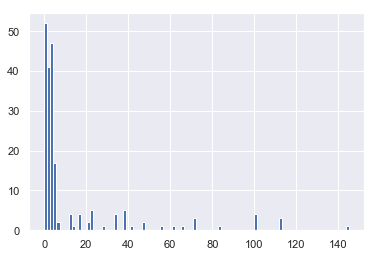

In [12]:
#filter to only wells in Black Widow area
black_widow_bugs = only_bugs_ages.loc[only_bugs_ages['API'].isin(black_widow_wells)]

#list of only ages
ages = black_widow_bugs['Age_MA'].values

#plot histogram of ages
plt.hist(ages, bins=100);

### Spike at <5 Ma implies this is a Pliocene Field, but why are the samples from the Early Cenozoic and Mesozoic?
### Let's try a different plot method.

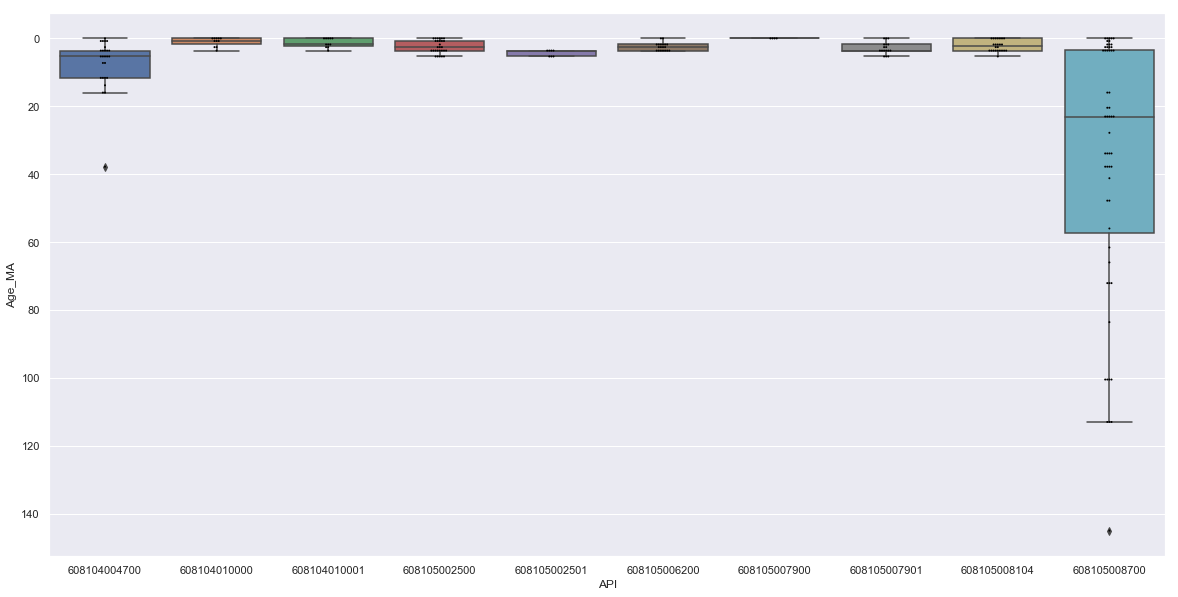

In [13]:
#Box Plots by well
f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="API", y="Age_MA", data=black_widow_bugs)
sns.swarmplot(x="API", y="Age_MA", data=black_widow_bugs,
             size=2, color='black', linewidth=0)
ax.invert_yaxis()

### Looks like only one well is causing the anomalous values.  Remaining wells are mostly Pliocene age range.
### Can we infer enviornment of deposition from the biostratigraphy?
Ecozone classification (i.e. 1=Inner Shelf, 7=Abyssal) are reported for majority of the samples.  Plotting them as a scatter of Age MA vs. Ecozone will inform us how environments have changed through time.

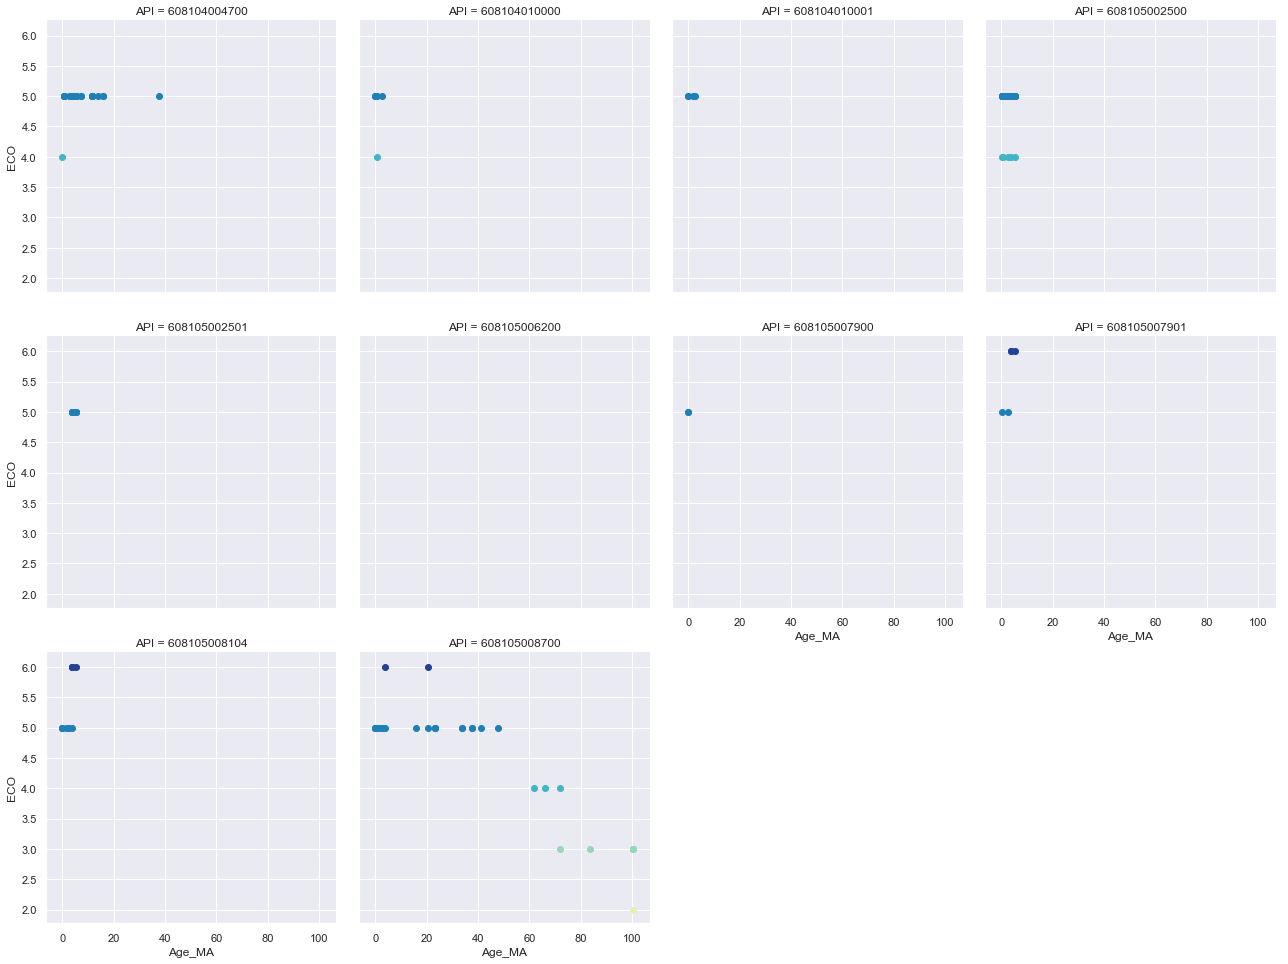

In [14]:
#Scatter Grid plot of Ecozones per well.

bw_eco_bugs = black_widow_bugs.copy()
bw_eco_bugs['ECO']=pd.to_numeric(bw_eco_bugs['ECO'], errors='coerce').dropna().astype(int) #remove rows where no ecozone data present

g = sns.FacetGrid(bw_eco_bugs, col="API", hue="ECO", palette="YlGnBu",
                     col_wrap=4, height=4.5)
g = g.map(plt.scatter, "Age_MA", 'ECO')